# KMeans

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [44]:
# 데이터 생성
n_sample = 300
n_clusters = 3

In [45]:
x, y = make_blobs(n_samples=n_sample, centers=n_clusters, random_state=42)

c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


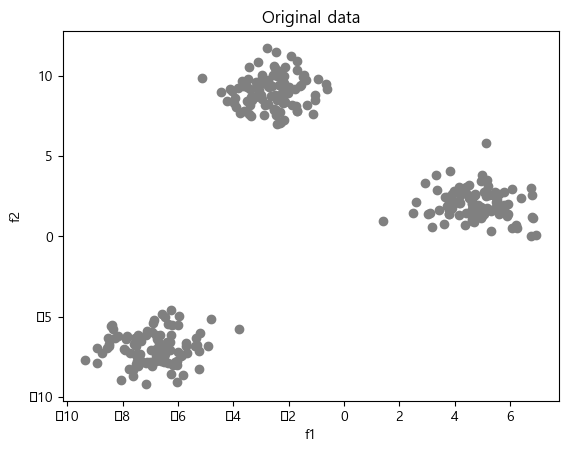

In [46]:
# 그래프
plt.scatter(x[:, 0], x[:, 1], c='gray', label='Original data')
plt.title('Original data')
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()

In [47]:
# KMeans 객체 생성 -> 학습
kmeans = KMeans(n_clusters=3, random_state=42)

In [48]:
# 학습
cluster_labels = kmeans.fit_predict(x)

c:\Project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


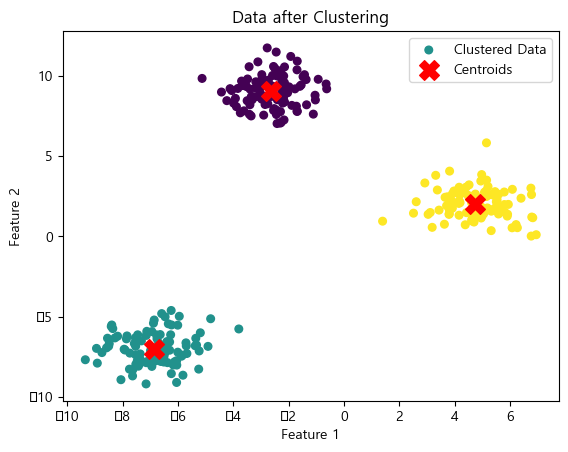

In [49]:
# 4. 군집화 결과 시각화
# 각 데이터 포인트의 클러스터에 따라 색을 지정
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels, cmap='viridis', s=30, label="Clustered Data")

# 클러스터 중심 시각화
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
s=200, c='red', label="Centroids", marker='X')
plt.title("Data after Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

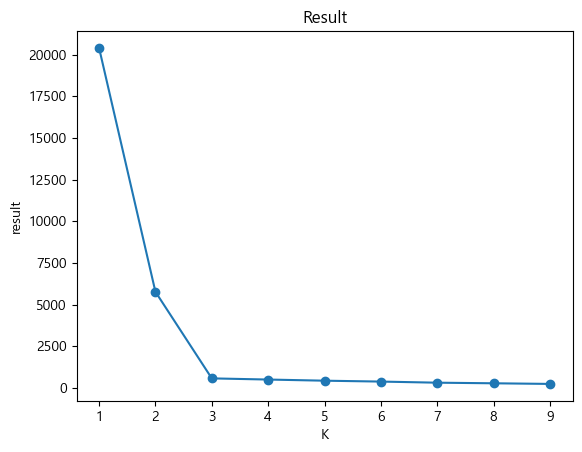

In [50]:
# 최적의 K 찾기
result = []

for k in range(1, 10) :
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit_predict(x)   # 내부적으로 학습
    result.append(kmeans_temp.inertia_)

plt.plot(range(1, 10), result, marker='o')
plt.title('Result')

plt.xlabel('K')
plt.ylabel('result')
plt.show()

In [51]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [52]:
# 실루엣 스코어
sil_avg = silhouette_score(x, cluster_labels)
print(sil_avg)  # 1에 가까울 수록 응집이 잘 되어 있음

0.8480303059596955


In [53]:
# 시각화를 위한 점수 계산
sil_values = silhouette_samples(x, cluster_labels)
print(sil_values)

[0.90593228 0.90295138 0.78292932 0.82801009 0.85347199 0.87164904
 0.87660124 0.87599826 0.87967189 0.85542272 0.8185558  0.87259676
 0.74387596 0.84157115 0.90743902 0.87272287 0.87580064 0.72626456
 0.86269038 0.78265318 0.78367684 0.88236857 0.86744598 0.91367619
 0.87177917 0.84973102 0.88991326 0.69411153 0.86247358 0.84701361
 0.85559028 0.86435444 0.88923506 0.81530708 0.84205606 0.84407722
 0.89049865 0.87854612 0.90341598 0.76522292 0.84764565 0.8725714
 0.91062018 0.81940318 0.8287758  0.82800398 0.91293113 0.86613733
 0.9101851  0.81830486 0.87279139 0.85655332 0.90111562 0.76870605
 0.87629642 0.52748913 0.90894375 0.83452366 0.86343982 0.86125249
 0.88918749 0.76979529 0.86487455 0.69836723 0.88372903 0.82959834
 0.85491415 0.88631591 0.8734638  0.86485178 0.85190407 0.85010535
 0.90260065 0.86305493 0.80711153 0.90990924 0.85777116 0.85024895
 0.87568057 0.85626803 0.86869093 0.86376756 0.89694868 0.85592685
 0.86287428 0.88174667 0.87343813 0.75129446 0.81999592 0.82172

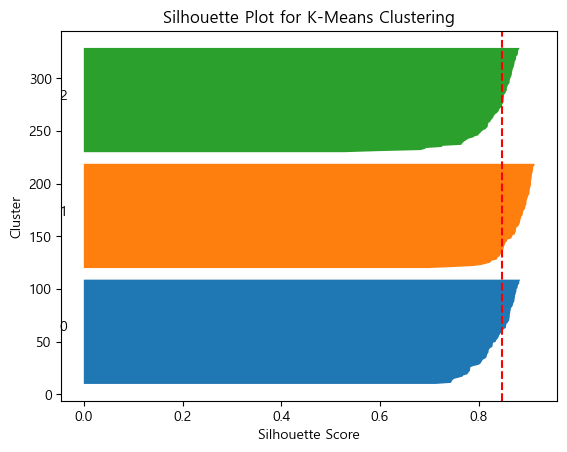

In [54]:
# 시각화 준비
y_lower = 10

for i in range(3): # 각 클러스터에 대해 반복
    ith_cluster_silhouette_values = sil_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # 클러스터별 막대 그리기
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # 클러스터 번호
    y_lower = y_upper + 10 # 다음 클러스터로 이동

# 그래프 설정
plt.axvline(x=sil_avg, color="red", linestyle="--") # 평균 실루엣 점수
plt.title("Silhouette Plot for K-Means Clustering")
plt.xlabel("Silhouette Score")
plt.ylabel("Cluster")
plt.show()

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [57]:
iris = load_iris()

x = iris.data       # 특성 : 4개
y = iris.target     # 0, 1, 2

In [58]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [59]:
pca = PCA(n_components=2)

In [60]:
x_pca = pca.fit_transform(x_scaled)

In [61]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


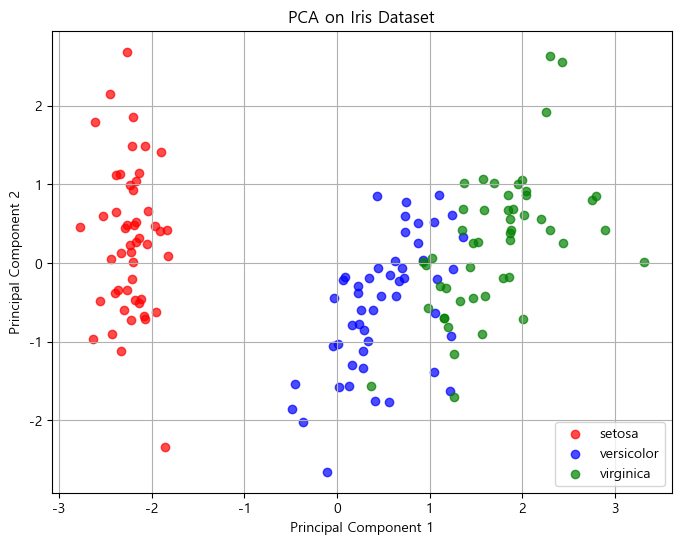

In [75]:
# 5. PCA 결과 시각화
# - 두 개의 주성분을 사용해 데이터를 2D 플롯으로 시각화
plt.figure(figsize=(8, 6))

for target, color, label in zip([0, 1, 2], ['red', 'blue', 'green'], iris.target_names):
    plt.scatter(x_pca[y == target, 0], # 첫 번째 주성분
                x_pca[y == target, 1], # 두 번째 주성분
                color=color, label=label, alpha=0.7)
plt.rcParams['axes.unicode_minus'] = False
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

In [63]:
# Isolation Forest : 이상치 탐지
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [64]:
np.random.seed(42)

In [ ]:
# 정상 100개, 이상 10개 => 2차원
normal_traffic = np.random.normal(loc=50, scale=10, size=(100,2))
# print(normal_traffic)
ano_traffic = np.random.uniform(low=100, high=150, size=(10,2))
print(ano_traffic)

[[143.8686536  137.03843089]
 [134.85078705 135.1242042 ]
 [117.97455756 114.67959221]
 [140.46805777 140.50566973]
 [143.35361593 145.66202763]
 [125.56711994 125.07581473]
 [139.91475895 132.49819654]
 [135.09834386 139.78963347]
 [144.50026709 116.89975784]
 [118.77914763 104.69909699]]


In [86]:
traffic_data = np.vstack((normal_traffic, ano_traffic))
traffic_df = pd.DataFrame(traffic_data, columns=['Request Count', 'Response Time'])

In [87]:
model = IsolationForest(n_estimators=100, contamination=0.09, random_state=42)

In [88]:
traffic_df['Anomaly Score'] = model.fit_predict(traffic_data)

In [89]:
traffic_df

,Request Count,Response Time,Anomaly Score
0,54.967142,48.617357,1
1,56.476885,65.230299,1
2,47.658466,47.658630,1
3,65.792128,57.674347,1
4,45.305256,55.425600,1
...,...,...,...
105,125.567120,125.075815,-1
106,139.914759,132.498197,-1
107,135.098344,139.789633,-1
108,144.500267,116.899758,-1


In [77]:
traffic_df.describe()

,Request Count,Response Time,Anomaly Score
count,110.000000,110.000000,110.000000
mean,56.625555,57.509043,0.836364
std,26.194878,24.978230,0.550684
min,23.802549,30.124311,-1.000000
25%,43.418818,44.487168,1.000000
50%,50.592195,52.145575,1.000000
75%,56.421832,58.490949,1.000000
max,144.500267,145.662028,1.000000


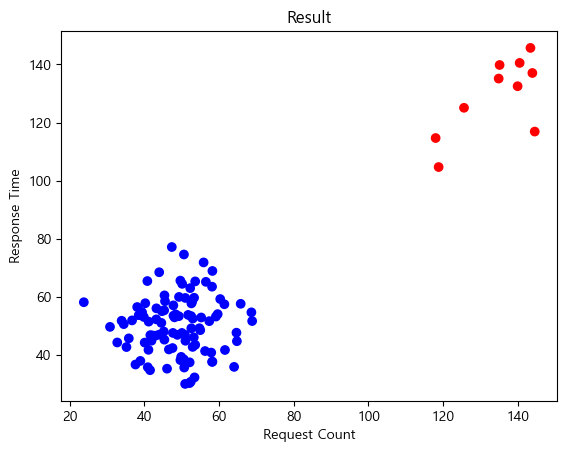

In [90]:
plt.scatter(
    traffic_df['Request Count'], traffic_df['Response Time'],
    c=traffic_df['Anomaly Score'].map({1: 'blue', -1:'red'}),
    label='Traffic'
)
plt.title('Result')
plt.xlabel('Request Count')
plt.ylabel('Response Time')

plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

In [91]:
dbscan = DBSCAN(eps=15, min_samples=5)

In [93]:
traffic_df['Cluster'] = dbscan.fit_predict(traffic_df)

In [94]:
print(traffic_df)

     Request Count  Response Time  Anomaly Score  Cluster
0        54.967142      48.617357              1        0
1        56.476885      65.230299              1        0
2        47.658466      47.658630              1        0
3        65.792128      57.674347              1        0
4        45.305256      55.425600              1        0
..             ...            ...            ...      ...
105     125.567120     125.075815             -1        1
106     139.914759     132.498197             -1        1
107     135.098344     139.789633             -1        1
108     144.500267     116.899758             -1       -1
109     118.779148     104.699097             -1       -1

[110 rows x 4 columns]


In [95]:
traffic_df['Anomaly'] = traffic_df['Anomaly Score'].apply(lambda x: "Normal" if x == 1 else "Anomaly")

In [96]:
print(traffic_df)

     Request Count  Response Time  Anomaly Score  Cluster  Anomaly
0        54.967142      48.617357              1        0   Normal
1        56.476885      65.230299              1        0   Normal
2        47.658466      47.658630              1        0   Normal
3        65.792128      57.674347              1        0   Normal
4        45.305256      55.425600              1        0   Normal
..             ...            ...            ...      ...      ...
105     125.567120     125.075815             -1        1  Anomaly
106     139.914759     132.498197             -1        1  Anomaly
107     135.098344     139.789633             -1        1  Anomaly
108     144.500267     116.899758             -1       -1  Anomaly
109     118.779148     104.699097             -1       -1  Anomaly

[110 rows x 5 columns]


In [70]:
anomalous_data = traffic_df[traffic_df['Anomaly'] == "Anomaly"]

In [97]:
min_req_count = anomalous_data['Request Count'].min()
max_req_count = anomalous_data['Request Count'].max()
min_res_time = anomalous_data['Response Time'].min()
max_res_time = anomalous_data['Response Time'].max()

In [98]:
print('min_req_count : ', min_req_count)
print('max_req_count : ', max_req_count)
print('min_res_time : ', min_res_time)
print('max_res_time : ', max_res_time)

min_req_count :  117.97455756098776
max_req_count :  144.5002670908783
min_res_time :  104.69909699204345
max_res_time :  145.66202762782356


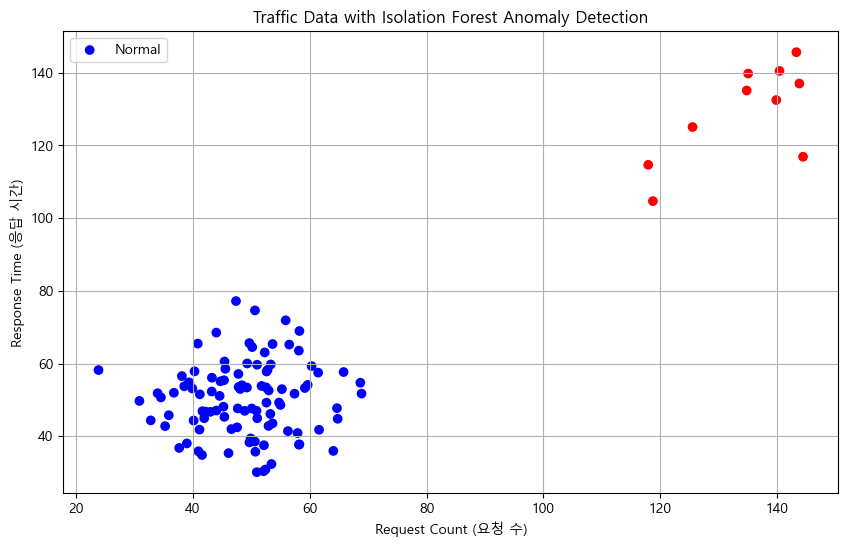

In [102]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(10, 6))
plt.scatter(
    traffic_df['Request Count'], traffic_df['Response Time'],
    c = traffic_df['Anomaly'].map({'Normal': 'blue', 'Anomaly':'red'}),
    label = 'Traffic'
)
plt.title("Traffic Data with Isolation Forest Anomaly Detection")
plt.xlabel("Request Count (요청 수)")
plt.ylabel("Response Time (응답 시간)")
plt.legend(["Normal", "Anomaly"])
plt.grid()
plt.show()

In [ ]:
# github 연동